In [39]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import glob
import struct

In [ ]:
def read_pfm(filename):
    with Path(filename).open('rb') as pfm_file:

        line1, line2, line3 = (pfm_file.readline().decode('latin-1').strip() for _ in range(3))
        assert line1 in ('PF', 'Pf')
        
        channels = 3 if "PF" in line1 else 1
        width, height = (int(s) for s in line2.split())
        scale_endianess = float(line3)
        bigendian = scale_endianess > 0
        scale = abs(scale_endianess)

        buffer = pfm_file.read()
        samples = width * height * channels
        print(samples)
        assert len(buffer) == samples * 4
        
        fmt = f'{"<>"[bigendian]}{samples}f'
        decoded = struct.unpack(fmt, buffer)
        shape = (height, width, 3) if channels == 3 else (height, width)
        return (np.reshape(decoded, shape)) * scale


/home/shared/data_raw/LuSNAR/Moon_1/image0/depth
/home/shared/data_raw/LuSNAR/Moon_1/image0/depth/1693274798817782272.pfm
1048576


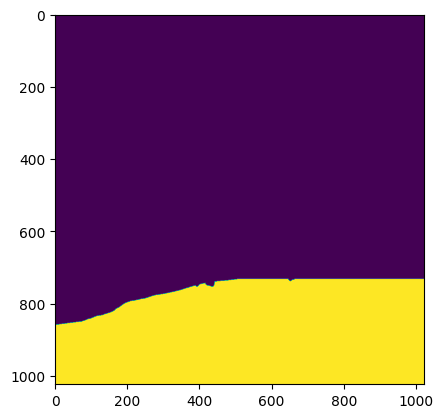

In [43]:
# Configuration ???where does this come from
data_path = os.path.abspath(('/home/shared/data_raw/LuSNAR/Moon_1/image0/'))

rgb_dir = Path(os.path.join(data_path,'rgb'))
depth_dir = Path(os.path.join(data_path, 'depth'))
# !!!Create but for the other datset.
print(depth_dir)
dataset = "LuSNAR"
if dataset=="LuSNAR":
    
    root_dir =Path(data_path)
    data_list = []
    count = 0

    for file in depth_dir.glob("*.pfm"):   
        added_path = f"{file}"
        absolute_filepath = os.path.abspath((str(file)))
        data_list.append(absolute_filepath)
    print(data_list[0])
    image = read_pfm(data_list[0])
    plt.imshow(image)
    plt.show()
    
    # print(image)
    # print("plotting")
    # plt.plot([1,2,3,2,4])
    # plt.show()
